In [1]:
%run ts_lib
%run ts_arima

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_tcs = pd.read_csv('data/TCS_20200303.csv', index_col=0, parse_dates=True)
data_tcs = data_tcs.loc[~data_tcs.index.duplicated(), :] #.asfreq('B')

In [4]:
train_tcs = data_tcs.loc[data_tcs.index < '2016', 'Close']
val_tcs = data_tcs.loc[(data_tcs.index >= '2016') & (data_tcs.index < '2018'), 'Close']
test_tcs = data_tcs.loc[data_tcs.index >= '2018', 'Close']
train_val_tcs = data_tcs.loc[data_tcs.index < '2018', 'Close']

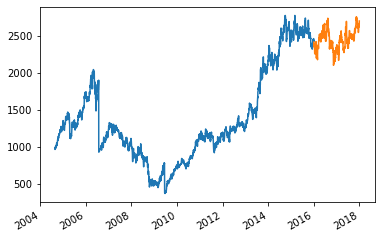

In [6]:
train_tcs.plot()
val_tcs.plot()

In [5]:
#train_tcs.to_frame().groupby(train_tcs.index.year).count().sort_values('Close').assign(count=1).groupby('Close').count()
#train_tcs.to_frame().groupby([train_tcs.index.year, train_tcs.index.quarter]).count().sort_values('Close').assign(count=1).groupby('Close').count()
#train_tcs.to_frame().groupby([train_tcs.index.year, train_tcs.index.month]).count().sort_values('Close').assign(count=1).groupby('Close').count()
#train_tcs.to_frame().groupby([train_tcs.index.year, train_tcs.index.week]).count().assign(count=1).groupby('Close').count()

In [22]:
#model0 = SARIMAModel(p=0, d=0, q=0)
#model1 = SARIMAModel(p=0, d=1, q=0)
#model2 = SARIMAModel(p=1, d=1, q=0)
#model3 = SARIMAModel(p=2, d=1, q=0)
#model4 = SARIMAModel(p=3, d=1, q=0)
model5 = SARIMAModel(p=4, d=1, q=0)  # best without seasonality
#model6 = SARIMAModel(p=5, d=1, q=0)
#model7 = SARIMAModel(p=6, d=1, q=0)
#model8 = SARIMAModel(p=4, d=1, q=1)
#model9 = SARIMAModel(p=4, d=1, q=2)
#model10 = SARIMAModel(p=4, d=1, q=3)
#model11 = SARIMAModel(p=4, d=1, q=4)
model12 = SARIMAModel(p=4, d=1, q=0, trend='n')
model13 = SARIMAModel(p=4, d=1, q=0, trend='c')
model14 = SARIMAModel(p=4, d=1, q=0, trend='t')
model15 = SARIMAModel(p=4, d=1, q=0, trend='ct')
model16 = SARIMAModel(p=4, d=1, q=0, periodicity=250, seasonal_d=1)
model17 = SARIMAModel(p=4, d=1, q=0, periodicity=250, seasonal_d=2)
model18 = SARIMAModel(p=4, d=1, q=0, periodicity=243, seasonal_d=1)
model19 = SARIMAModel(p=4, d=1, q=0, periodicity=244, seasonal_d=1)
model20 = SARIMAModel(p=4, d=1, q=0, periodicity=245, seasonal_d=1)
model21 = SARIMAModel(p=4, d=1, q=0, periodicity=246, seasonal_d=1)
model22 = SARIMAModel(p=4, d=1, q=0, periodicity=247, seasonal_d=1)  # optimal for 250 len data
model23 = SARIMAModel(p=4, d=1, q=0, periodicity=248, seasonal_d=1)
model24 = SARIMAModel(p=4, d=1, q=0, periodicity=249, seasonal_d=1)  # optimal for whole training set, fails with 250
model25 = SARIMAModel(p=4, d=1, q=0, periodicity=251, seasonal_d=1)
model26 = SARIMAModel(p=4, d=1, q=0, periodicity=252, seasonal_d=1)
model25 = SARIMAModel(p=4, d=1, q=0, periodicity=5, seasonal_d=1)
model26 = SARIMAModel(p=4, d=1, q=0, periodicity=18, seasonal_d=1)
model27 = SARIMAModel(p=4, d=1, q=0, periodicity=19, seasonal_d=1)
model28 = SARIMAModel(p=4, d=1, q=0, periodicity=20, seasonal_d=1)
model29 = SARIMAModel(p=4, d=1, q=0, periodicity=21, seasonal_d=1)
model30 = SARIMAModel(p=4, d=1, q=0, periodicity=22, seasonal_d=1)  # optimal for 30 len data
#model31 = SARIMAModel(p=4, d=1, q=0, periodicity=249, seasonal_d=1, seasonal_p=1)  # best but extremely slow
model32 = SARIMAModel(p=4, d=1, q=0, periodicity=60, seasonal_d=1)
model33 = SARIMAModel(p=4, d=1, q=0, periodicity=61, seasonal_d=1)
model34 = SARIMAModel(p=4, d=1, q=0, periodicity=62, seasonal_d=1)
model35 = SARIMAModel(p=4, d=1, q=0, periodicity=63, seasonal_d=1)  # optimal for 100 len data

In [31]:
param_items = {'p': [0, 1, 2, 3, 4],
               'd': [0, 1],
               'q': [0, 1]}
param_0 = generate_param_list(param_items)
print(len(param_0))

20


In [5]:
param_items = {'p': [4],
               'd': [1],
               'seasonal_d': [1],
               'periodicity': list(range(243, 253))}
param_1 = generate_param_list(param_items)
print(len(param_1))

10


In [6]:
param_items = {'p': [4],
               'd': [1],
               'seasonal_d': [1],
               'periodicity': list(range(59, 67))}
param_2 = generate_param_list(param_items)
print(len(param_2))

8


In [7]:
param_items = {'p': [4],
               'd': [1],
               'seasonal_d': [1],
               'periodicity': [4, 5] + list(range(18, 24))}
param_3 = generate_param_list(param_items)
print(len(param_3))

8


In [28]:
def eval_param_list(param_list, data):
    aic_list = []
    for param in param_list:
        model = SARIMAModel(**param)
        aic_list.append(model.aic_from_fit(data))
    param_df = pd.DataFrame(param_list)
    param_df = pd.concat([param_df, pd.Series(aic_list, name='AIC')], axis=1).sort_values('AIC')
    return param_df

In [33]:
eval_param_list(param_0, train_tcs)

,p,d,q,AIC
18,4,1,0,27631.734348
19,4,1,1,27632.581103
11,2,1,1,27634.243112
15,3,1,1,27635.192331
14,3,1,0,27638.241867
2,0,1,0,27639.234087
3,0,1,1,27641.191615
6,1,1,0,27641.192244
10,2,1,0,27641.518472
7,1,1,1,27643.192606


In [93]:
eval_param_list(param_1, train_tcs)

,p,d,seasonal_d,periodicity,AIC
8,4,1,1,251,26940.546306
9,4,1,1,252,26978.919542
6,4,1,1,249,26990.638180
0,4,1,1,243,27021.414598
3,4,1,1,246,27040.943434
5,4,1,1,248,27046.234331
2,4,1,1,245,27071.019598
7,4,1,1,250,27077.655228
1,4,1,1,244,27089.363597
4,4,1,1,247,27139.256422


In [92]:
res_final = []
for i in range(10, 0, -1):
    start_ind = i * 250
    end_ind = (i-1)*250
    res_df = eval_param_list(param_1, train_tcs.values[-start_ind:-end_ind])
    res_final.append(res_df.iloc[0:1, :])
res_final = pd.concat(res_final, axis=0)
res_final

,p,d,seasonal_d,periodicity,AIC
4,4,1,1,247,18.877053
3,4,1,1,246,21.565360
3,4,1,1,246,21.588842
4,4,1,1,247,27.625808
3,4,1,1,246,24.753742
4,4,1,1,247,28.638296
4,4,1,1,247,28.393019
3,4,1,1,246,18.203970
3,4,1,1,246,25.335212
0,4,1,1,243,NaN


In [94]:
res_final = []
for i in range(25, 0, -1):
    start_ind = i * 100
    end_ind = (i-1)*100
    res_df = eval_param_list(param_2, train_tcs.values[-start_ind:-end_ind])
    res_final.append(res_df.iloc[0:1, :])
res_final = pd.concat(res_final, axis=0)
res_final

,p,d,seasonal_d,periodicity,AIC
7,4,1,1,66,355.508843
7,4,1,1,66,372.497757
7,4,1,1,66,311.404921
7,4,1,1,66,337.608961
7,4,1,1,66,324.331420
6,4,1,1,65,342.844846
7,4,1,1,66,323.424713
7,4,1,1,66,333.165528
7,4,1,1,66,387.586204
7,4,1,1,66,277.040743


In [18]:
res_final = []
for i in range(50, 0, -1):
    start_ind = i * 30
    end_ind = (i-1)*30
    res_df = eval_param_list(param_3, train_tcs.values[-start_ind:-end_ind])
    res_final.append(res_df.iloc[0:1, :])
res_final = pd.concat(res_final, axis=0)
res_final

,p,d,seasonal_d,periodicity,AIC
7,4,1,1,23,47.470416
7,4,1,1,23,56.094080
7,4,1,1,23,44.109084
7,4,1,1,23,51.229672
7,4,1,1,23,44.544772
7,4,1,1,23,51.696326
7,4,1,1,23,58.688897
7,4,1,1,23,47.576302
7,4,1,1,23,54.233580
7,4,1,1,23,60.356666


In [9]:
model_250a = SARIMAModel(p=4, d=1, periodicity=246, seasonal_d=1)
model_250b = SARIMAModel(p=4, d=1, periodicity=247, seasonal_d=1)
model_100 = SARIMAModel(p=4, d=1, periodicity=66, seasonal_d=1)
model_30 = SARIMAModel(p=4, d=1, periodicity=23, seasonal_d=1)

In [26]:
pred_250a = model_250a.stepforward_predict(val_tcs.values, 250, fixed_history=True)

In [28]:
print(np.nanmean(np.square(pred_250a[1:] - val_tcs.values[251:])))
print(np.nanmean(np.square(pred_250a[1:] - val_tcs.diff().values[251:])))

6167554.610474781
3581.8077800052192


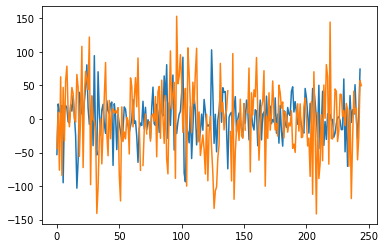

In [33]:
pd.Series(val_tcs.diff().values[251:]).plot()
pd.Series(pred_250a).plot()

In [10]:
pred_250b = model_250b.stepforward_predict(val_tcs.values, 250, fixed_history=True)

In [11]:
print(np.nanmean(np.square(pred_250b[1:] - val_tcs.values[251:])))
print(np.nanmean(np.square(pred_250b[1:] - val_tcs.diff().values[251:])))

6144145.5573132625
2148.167367549668


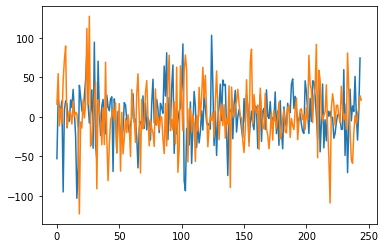

In [12]:
pd.Series(val_tcs.diff().values[251:]).plot()
pd.Series(pred_250b).plot()

In [13]:
pred_100 = model_100.stepforward_predict(val_tcs.values, 100, fixed_history=True)

In [15]:
print(np.nanmean(np.square(pred_100[1:] - val_tcs.values[101:])))
print(np.nanmean(np.square(pred_100[1:] - val_tcs.diff().values[101:])))

6064518.716877642
1450.1274019312357


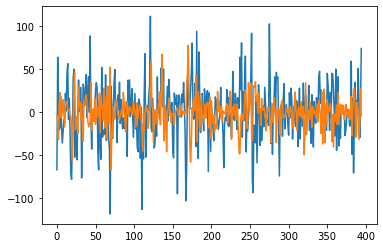

In [17]:
pd.Series(val_tcs.diff().values[100:]).plot()
pd.Series(pred_100).plot()

In [18]:
pred_30 = model_30.stepforward_predict(val_tcs.values, 30, fixed_history=True)

In [19]:
print(np.nanmean(np.square(pred_30[1:] - val_tcs.values[31:])))
print(np.nanmean(np.square(pred_30[1:] - val_tcs.diff().values[31:])))

6035705.111060231
4880.569742579562


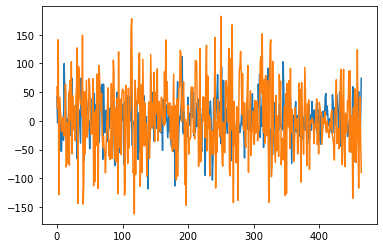

In [20]:
pd.Series(val_tcs.diff().values[30:]).plot()
pd.Series(pred_30).plot()

In [21]:
pred_all = model_250b.stepforward_predict(train_val_tcs.values, train_tcs.shape[0], fixed_history=False)

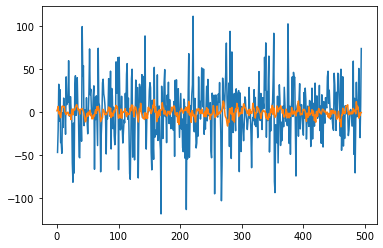

In [25]:
pd.Series(val_tcs.diff().values).plot()
pd.Series(pred_all).plot()

In [26]:
print(np.nanmean(np.square(pred_all[31:] - val_tcs.diff().values[31:])))
print(np.nanmean(np.square(pred_all[101:] - val_tcs.diff().values[101:])))
print(np.nanmean(np.square(pred_all[251:] - val_tcs.diff().values[251:])))

1098.4346257422235
1106.7195554661605
1025.1074745029243


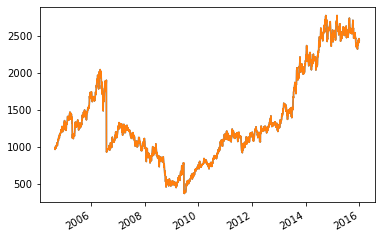

In [44]:
train_tcs.plot()
(train_tcs.iat[0] + (train_tcs.diff().fillna(0)).cumsum()).plot()

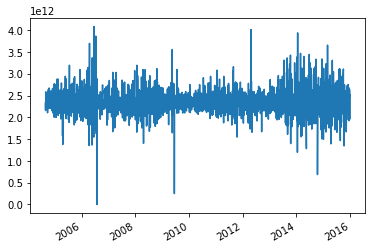

In [50]:
train_tcs_diff_bc.plot()

In [48]:
bc = BoxCoxScaler()
bc.fit(train_tcs.diff().dropna())
train_tcs_diff_bc = bc.transform(train_tcs.diff().fillna(0))
val_tcs_diff_bc = bc.transform(val_tcs.diff().fillna(0))
train_val_tcs_diff_bc = bc.transform(train_val_tcs.diff().fillna(0))

In [49]:
eval_param_list(param_0, train_tcs_diff_bc)

,p,d,q,AIC
19,4,1,1,156658.962510
15,3,1,1,156706.009865
3,0,1,1,156707.939186
7,1,1,1,156709.859957
11,2,1,1,156710.228241
17,4,0,1,156767.682745
5,1,0,1,156808.018915
9,2,0,1,156810.001852
13,3,0,1,156810.457779
18,4,1,0,157182.946995


In [52]:
param_items = {'p': [4],
               'd': [1],
               'q': [1],
               'seasonal_d': [1],
               'periodicity': list(range(243, 253))}
param_1bc = generate_param_list(param_items)
print(len(param_1bc))

10


In [54]:
param_items = {'p': [4],
               'd': [1],
               'q': [1],
               'seasonal_d': [1],
               'periodicity': list(range(59, 67))}
param_2bc = generate_param_list(param_items)
print(len(param_2bc))

8


In [55]:
param_items = {'p': [4],
               'd': [1],
               'q': [1],
               'seasonal_d': [1],
               'periodicity': [4, 5] + list(range(18, 24))}
param_3bc = generate_param_list(param_items)
print(len(param_3bc))

8


In [58]:
eval_param_list(param_1bc, train_tcs_diff_bc)

,p,d,q,seasonal_d,periodicity,AIC
9,4,1,1,1,252,144405.715212
8,4,1,1,1,251,144432.947637
6,4,1,1,1,249,144543.021533
7,4,1,1,1,250,144567.561535
5,4,1,1,1,248,144689.193547
3,4,1,1,1,246,144754.500287
4,4,1,1,1,247,144774.921082
0,4,1,1,1,243,144818.474919
2,4,1,1,1,245,144840.985940
1,4,1,1,1,244,144873.684775


In [59]:
res_final = []
for i in range(10, 0, -1):
    start_ind = i * 250
    end_ind = (i-1)*250
    res_df = eval_param_list(param_1bc, train_tcs_diff_bc.values[-start_ind:-end_ind])
    res_final.append(res_df.iloc[0:1, :])
res_final = pd.concat(res_final, axis=0)
res_final

,p,d,q,seasonal_d,periodicity,AIC
4,4,1,1,1,247,119.593292
4,4,1,1,1,247,125.171973
4,4,1,1,1,247,120.132933
4,4,1,1,1,247,125.370249
4,4,1,1,1,247,121.825391
4,4,1,1,1,247,122.521873
4,4,1,1,1,247,125.396134
4,4,1,1,1,247,118.440676
4,4,1,1,1,247,116.373649
0,4,1,1,1,243,NaN


In [60]:
res_final = []
for i in range(25, 0, -1):
    start_ind = i * 100
    end_ind = (i-1)*100
    res_df = eval_param_list(param_2bc, train_tcs_diff_bc.values[-start_ind:-end_ind])
    res_final.append(res_df.iloc[0:1, :])
res_final = pd.concat(res_final, axis=0)
res_final

,p,d,q,seasonal_d,periodicity,AIC
7,4,1,1,1,66,1889.838234
7,4,1,1,1,66,1898.885990
7,4,1,1,1,66,1842.502680
7,4,1,1,1,66,1865.434354
7,4,1,1,1,66,1853.439049
7,4,1,1,1,66,1878.953806
7,4,1,1,1,66,1854.342679
7,4,1,1,1,66,1860.643315
7,4,1,1,1,66,1882.602052
7,4,1,1,1,66,1807.450645


In [61]:
res_final = []
for i in range(50, 0, -1):
    start_ind = i * 30
    end_ind = (i-1)*30
    res_df = eval_param_list(param_3bc, train_tcs_diff_bc.values[-start_ind:-end_ind])
    res_final.append(res_df.iloc[0:1, :])
res_final = pd.concat(res_final, axis=0)
res_final

,p,d,q,seasonal_d,periodicity,AIC
4,4,1,1,1,20,497.746853
4,4,1,1,1,20,494.150284
4,4,1,1,1,20,500.806561
4,4,1,1,1,20,509.224710
3,4,1,1,1,19,575.205960
4,4,1,1,1,20,541.260356
4,4,1,1,1,20,513.297850
2,4,1,1,1,18,626.116992
4,4,1,1,1,20,513.415995
3,4,1,1,1,19,604.160503


In [67]:
model = SARIMAModel(p=4, d=1, q=1, periodicity=20, seasonal_d=1, seasonal_p=0)
model.aic_from_fit(train_tcs_diff_bc.values[-60:-30])

518.3281947484286

In [68]:
model = SARIMAModel(p=4, d=1, q=1, periodicity=20, seasonal_d=1, seasonal_p=1)
model.aic_from_fit(train_tcs_diff_bc.values[-60:-30])

508.8973004589989

In [72]:
model = SARIMAModel(p=4, d=1, q=1, periodicity=66, seasonal_d=1, seasonal_p=0)
model.aic_from_fit(train_tcs_diff_bc.values[-200:-100])

1870.380845830087

In [73]:
model = SARIMAModel(p=4, d=1, q=1, periodicity=66, seasonal_d=1, seasonal_p=1)
model.aic_from_fit(train_tcs_diff_bc.values[-200:-100])

1872.3808458337708

In [78]:
model_bc_250 = SARIMAModel(p=4, d=1, q=1, periodicity=247, seasonal_d=1)
model_bc_100 = SARIMAModel(p=4, d=1, q=1, periodicity=66, seasonal_d=1)
model_bc_30 = SARIMAModel(p=4, d=1, q=1, periodicity=20, seasonal_d=1, seasonal_p=1)

In [80]:
pred_bc_250 = model_bc_250.stepforward_predict(val_tcs_diff_bc.values, 250, fixed_history=True)

In [90]:
pd1 = bc.inverse_transform(pred_bc_250)
pd2 = bc.inverse_transform(pred_bc_250.cumsum())
print(np.nanmean(np.square(pd1[1:] - val_tcs.diff().values[251:])))
print(np.nanmean(np.square(pd2[1:] - val_tcs.diff().values[251:])))

147321.4475057356
28225.381591574624


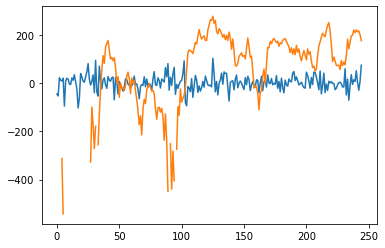

In [91]:
pd.Series(val_tcs.diff().values[250:]).plot()
pd.Series(pd2).plot()

In [92]:
pred_bc_100 = model_bc_100.stepforward_predict(val_tcs_diff_bc.values, 100, fixed_history=True)

In [93]:
pd1 = bc.inverse_transform(pred_bc_100)
pd2 = bc.inverse_transform(pred_bc_100.cumsum())
print(np.nanmean(np.square(pd1[1:] - val_tcs.diff().values[101:])))
print(np.nanmean(np.square(pd2[1:] - val_tcs.diff().values[101:])))

158256.89403775684
29563.09287275466


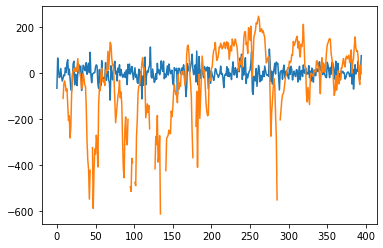

In [94]:
pd.Series(val_tcs.diff().values[100:]).plot()
pd.Series(pd2).plot()

In [95]:
pred_bc_30 = model_bc_30.stepforward_predict(val_tcs_diff_bc.values, 30, fixed_history=True)

In [97]:
pd1 = bc.inverse_transform(pred_bc_30)
pd2 = bc.inverse_transform(pred_bc_30.cumsum())
print(np.nanmean(np.square(pd1[1:] - val_tcs.diff().values[31:])))
print(np.nanmean(np.square(pd2[1:] - val_tcs.diff().values[31:])))

130713.83213923639
nan


In [101]:
pred_bc_all = model_bc_250.stepforward_predict(train_val_tcs_diff_bc.values, train_tcs_diff_bc.shape[0], fixed_history=False)

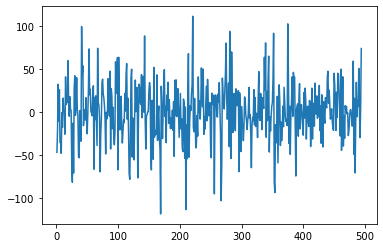

In [102]:
pd.Series(val_tcs.diff().values).plot()
pd.Series(bc.inverse_transform(pred_bc_all).cumsum()).plot()

In [103]:
pd2 = bc.inverse_transform(pred_bc_all).cumsum()
print(np.nanmean(np.square(pd2[31:] - val_tcs.diff().values[31:])))
print(np.nanmean(np.square(pd2[101:] - val_tcs.diff().values[101:])))
print(np.nanmean(np.square(pd2[251:] - val_tcs.diff().values[251:])))

nan
nan
nan
